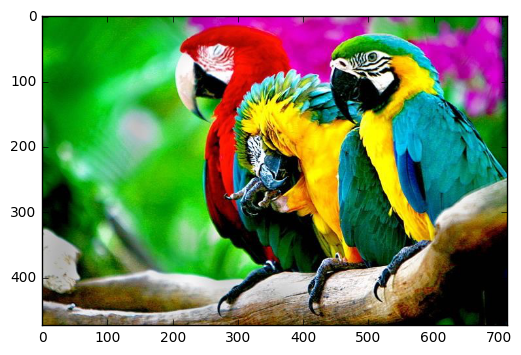

In [1]:
%matplotlib inline
from skimage.io import imread
import pylab

image = imread('parrots.jpg')
pylab.imshow(image)

In [4]:
from skimage import img_as_float

# image to objects-features matrix by pixels
x = img_as_float(image).reshape((-1, 3))

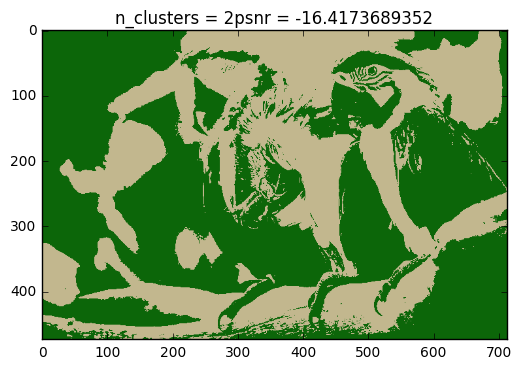

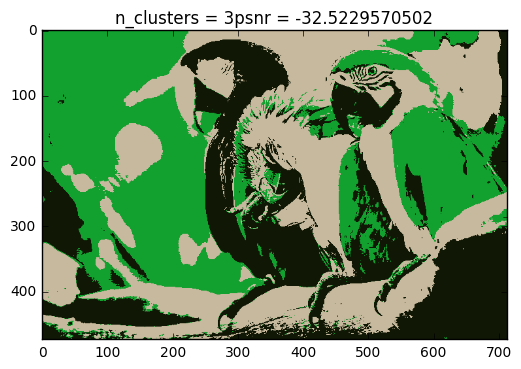

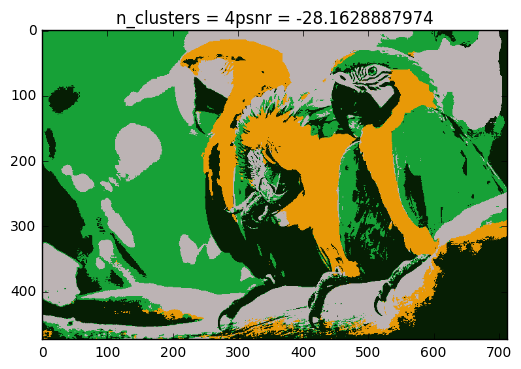

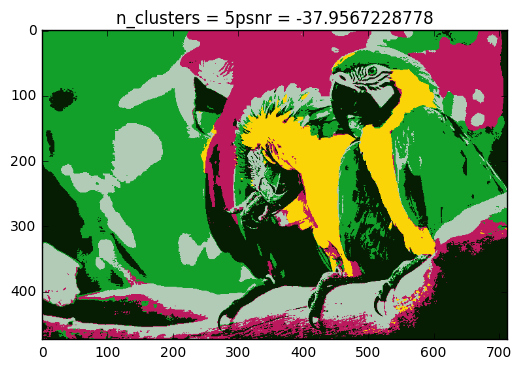

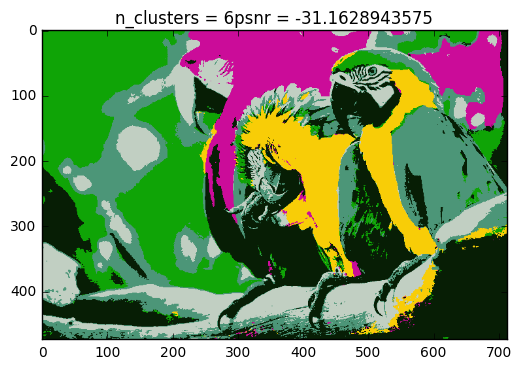

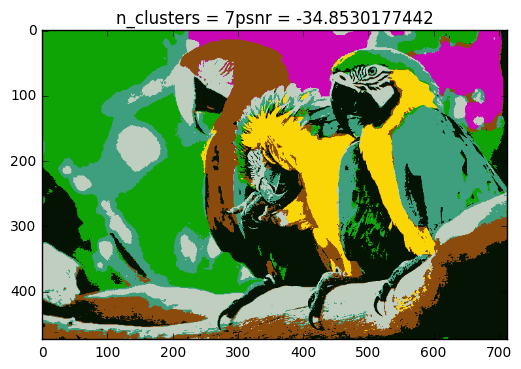

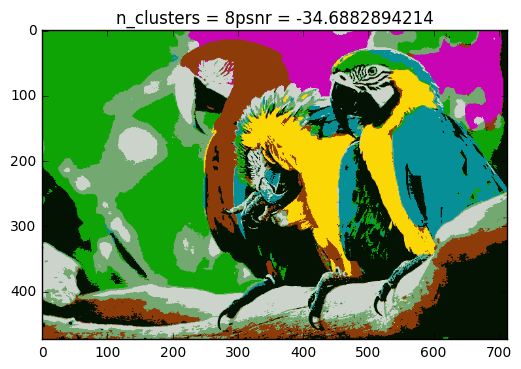

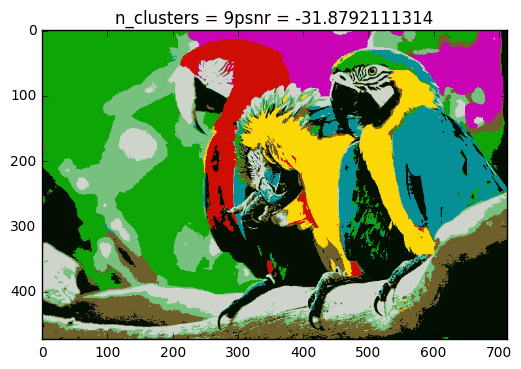

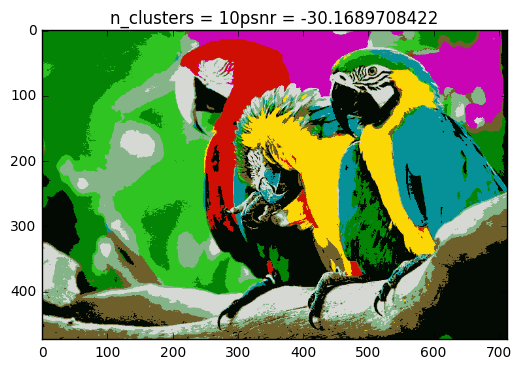

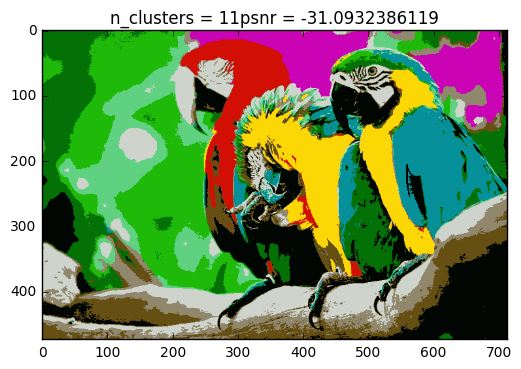

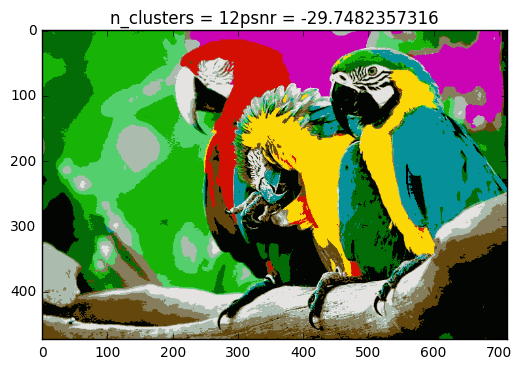

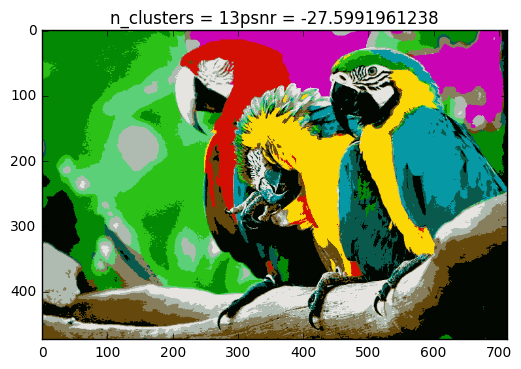

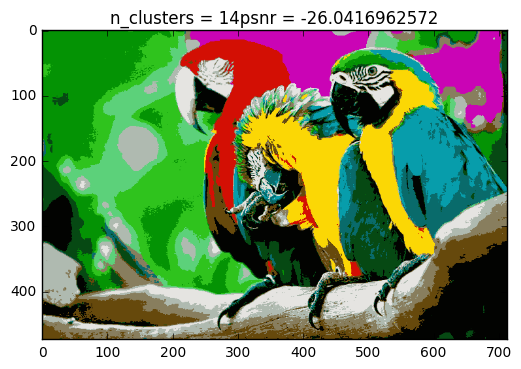

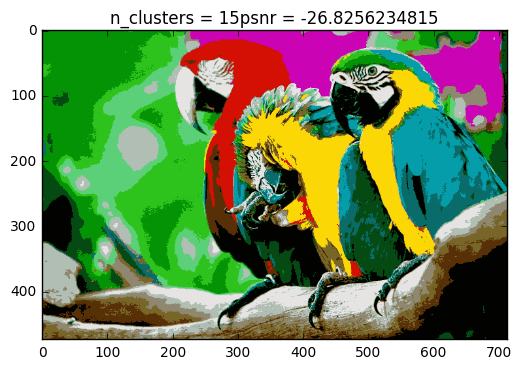

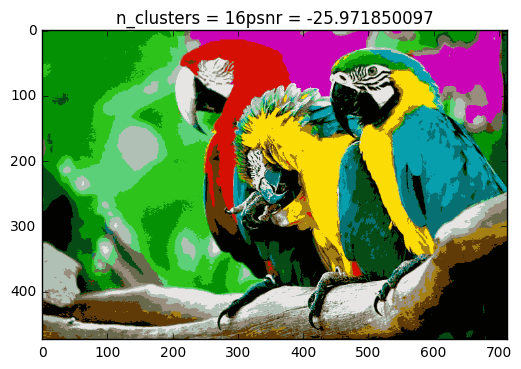

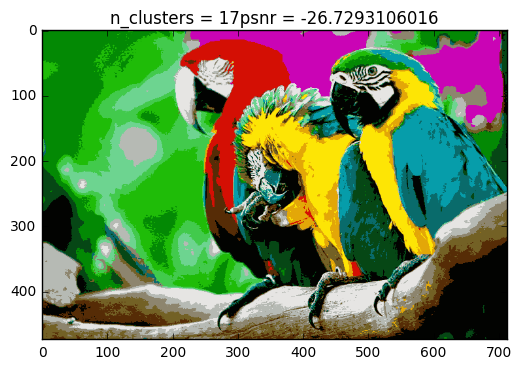

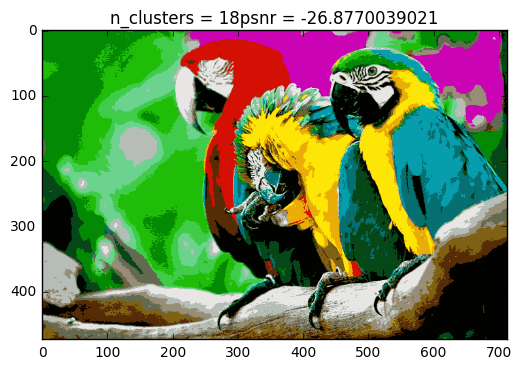

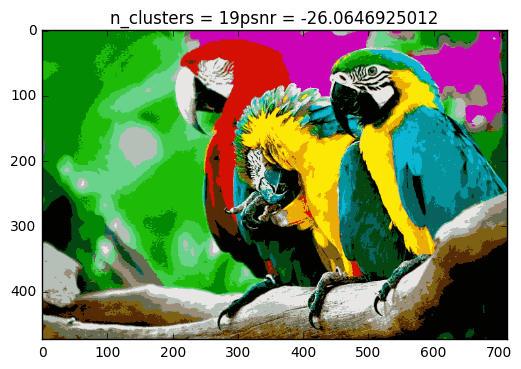

In [5]:
from sklearn.cluster import KMeans
import pandas
import matplotlib.pyplot as plt
import numpy as np

def psnr(image1, image2):
    # https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio
    # MSE part of PSNR metrics
    mse = np.power(np.sum(image1 - image2), 2) / image1.shape[0] * image1.shape[1]
    return 20 * np.log10(1.0) - 10 * np.log10(mse)

for n_clusters in range(2, 20):
# n_clusters = 8
    clst = KMeans(init='k-means++', random_state=241, n_clusters=n_clusters).fit(x)
    x_df = pandas.DataFrame({'R': x[:, 0],
                         'G': x[:, 1],
                         'B': x[:, 2],
                         'label': clst.labels_}, columns=['R', 'G', 'B', 'label'])
    # Replace values in one cluster with cluster's median value
    for label in range(n_clusters):
        x_df.loc[x_df['label'] == label, 'R'] = np.median(x_df['R'].loc[x_df['label'] == label].as_matrix())
        x_df.loc[x_df['label'] == label, 'G'] = np.median(x_df['G'].loc[x_df['label'] == label].as_matrix())
        x_df.loc[x_df['label'] == label, 'B'] = np.median(x_df['B'].loc[x_df['label'] == label].as_matrix())

    plt.figure()
    plt.title('n_clusters = ' + str(n_clusters) + 'psnr = ' + str(psnr(x, x_df[['R', 'G', 'B']].as_matrix())))
    plt.imshow(x_df[['R', 'G', 'B']].as_matrix().reshape(474, 713, 3))
#     pylab.imshow(x_df[['R', 'G', 'B']].as_matrix().reshape(474, 713, 3))